In [22]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

URL = "https://results.eci.gov.in/PcResultGenJune2024/index.htm"
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

In [ ]:
table = soup.find('table', class_='table')
print(table)
headers = [th.text.strip() for th in table.find('thead').find_all('th')]

data = []
for row in table.find('tbody').find_all('tr')[:-1]:
  data.append([td.text.strip() for td in row.find_all('td')])

df = pd.DataFrame(data, columns=headers)

print(df)

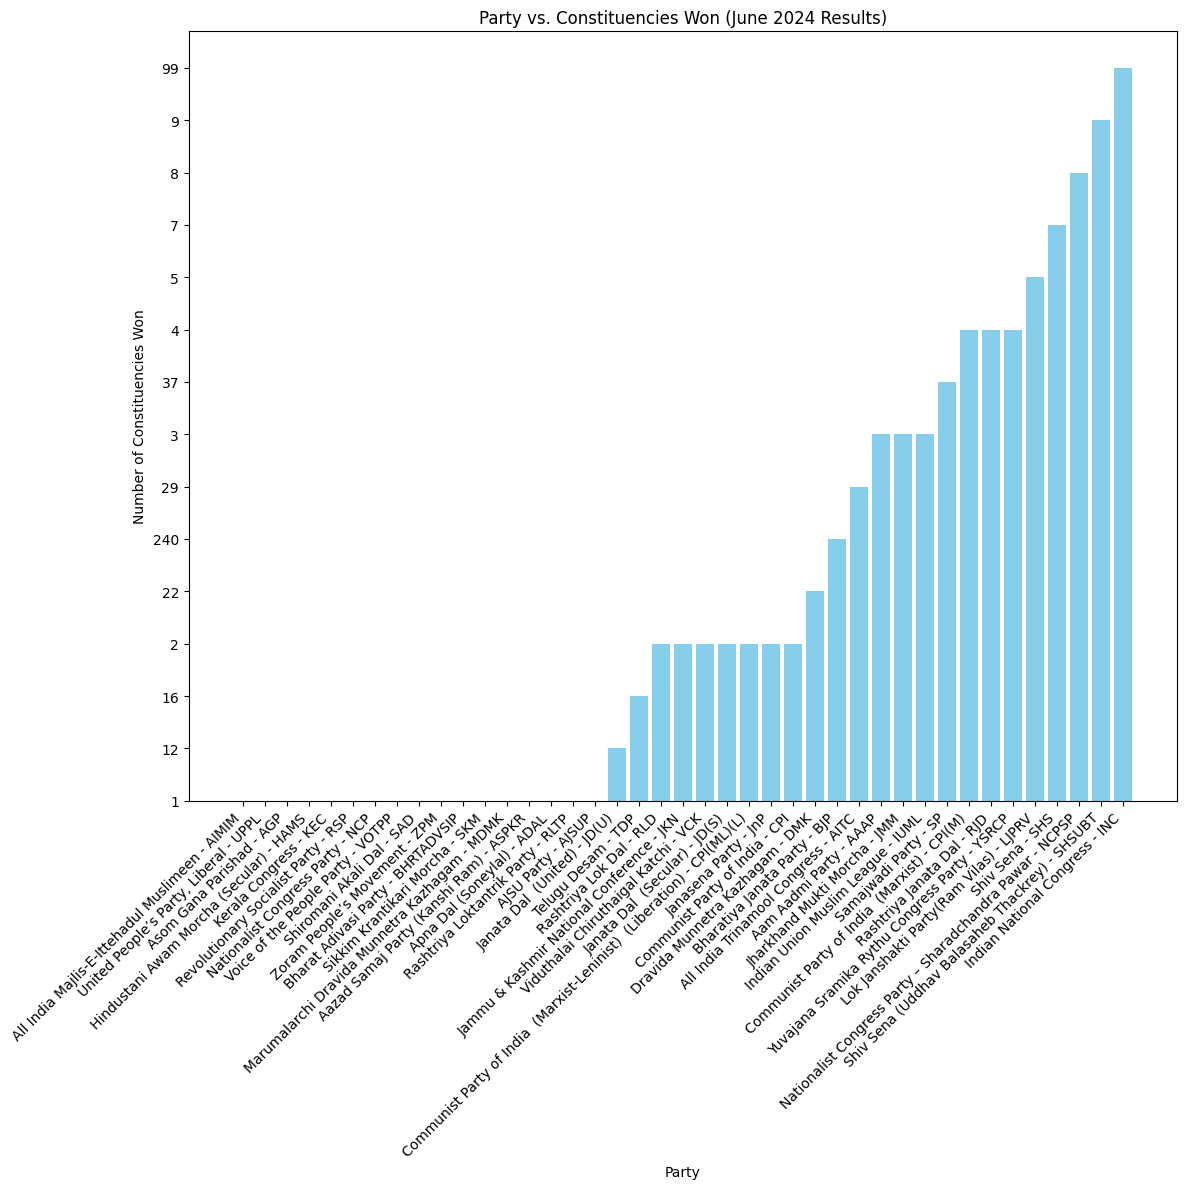

In [43]:
df_sorted = df.sort_values(by='Won', ascending=True)

plt.figure(figsize=(12, 12))
plt.bar(df_sorted['Party'], df_sorted['Won'], color='skyblue')
plt.xlabel('Party')
plt.ylabel('Number of Constituencies Won')
plt.title('Party vs. Constituencies Won (June 2024 Results)')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()